In [2]:
pip install tensorflow numpy pandas matplotlib scikit-learn


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 116ms/step - accuracy: 0.6308 - loss: 1.2819 - val_accuracy: 0.8735 - val_loss: 0.3997
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 94s 139ms/step - accuracy: 0.8883 - loss: 0.3463 - val_accuracy: 0.9060 - val_loss: 0.3011
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.9118 - loss: 0.2684 - val_accuracy: 0.9088 - val_loss: 0.2843
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 141ms/step - accuracy: 0.9270 - loss: 0.2183 - val_accuracy: 0.9153 - val_loss: 0.2600
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 69s 137ms/step - accuracy: 0.9347 - loss: 0.1932 - val_accuracy: 0.9215 - val_loss: 0.2533
555/555 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9186 - loss: 0.2474
✅ Test Accuracy: 91.72%
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
📁 Predictions saved to cnn_char_predictions.csv


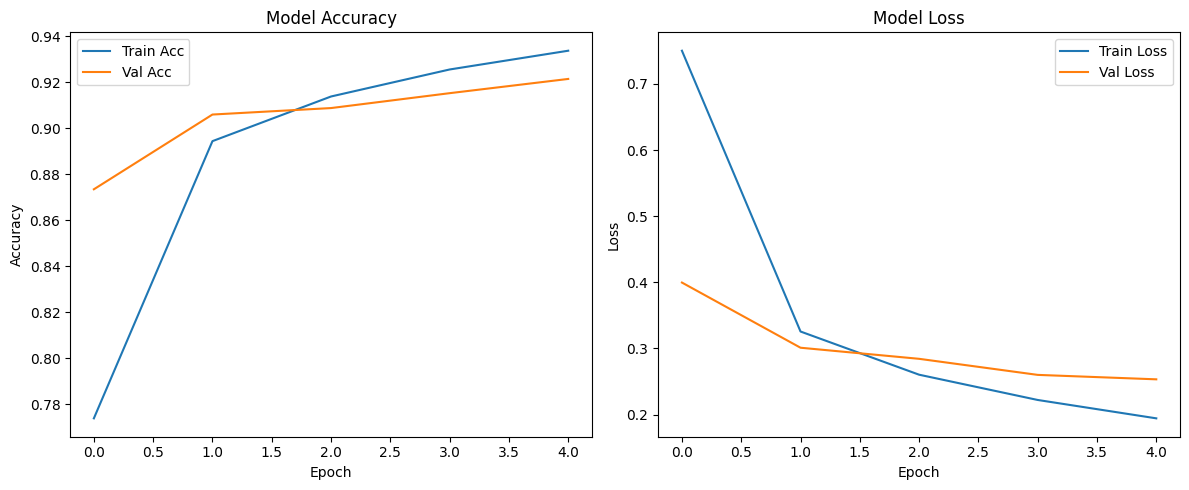

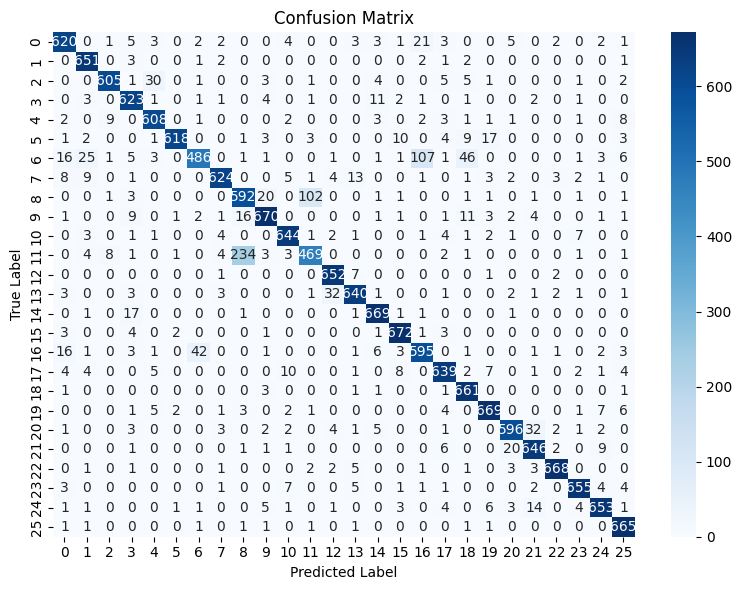

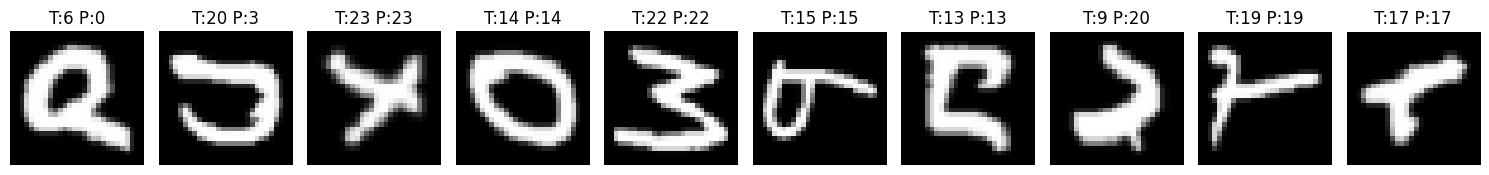


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       678
           1       0.92      0.98      0.95       663
           2       0.97      0.92      0.94       659
           3       0.91      0.96      0.93       652
           4       0.92      0.95      0.94       642
           5       0.99      0.92      0.95       672
           6       0.90      0.69      0.78       705
           7       0.96      0.92      0.94       678
           8       0.70      0.82      0.75       725
           9       0.93      0.92      0.93       725
          10       0.95      0.96      0.95       673
          11       0.80      0.64      0.71       732
          12       0.93      0.98      0.96       663
          13       0.94      0.93      0.93       691
          14       0.95      0.97      0.96       692
          15       0.95      0.98      0.97       687
          16       0.81      0.88      0.84       677
 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from google.colab import files
import io
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values
X = X.reshape(-1, 28, 28, 1).astype("float32") / 255.0
num_classes = len(np.unique(y))
y = y - 1
y_cat = to_categorical(y, num_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f" Test Accuracy: {test_acc:.2%}")
y_test_labels = np.argmax(y_test, axis=1)
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
results = pd.DataFrame({'Actual': y_test_labels, 'Predicted': y_pred_labels})
results.to_csv("cnn_char_predictions.csv", index=False)
print(" Predictions saved to cnn_char_predictions.csv")
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
conf_mtx = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
def show_predictions(images, actual, predicted, count=10):
    plt.figure(figsize=(15, 2))
    for i in range(count):
        plt.subplot(1, count, i + 1)
        plt.imshow(images[i].reshape(28,28), cmap='gray')
        plt.title(f"T:{actual[i]} P:{predicted[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
show_predictions(X_test, y_test_labels, y_pred_labels)
print("\n Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))